## I will be training many models for this dataset and choosing the best one by comparing their accuracy.

### Importing libraries, dataset and performing Exploratory data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [3]:
telecom_df = pd.read_csv('telecom_churn.csv')

In [4]:
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [6]:
telecom_df.shape

(5000, 21)

In [7]:
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [8]:
telecom_df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

### Performing Data Visualization

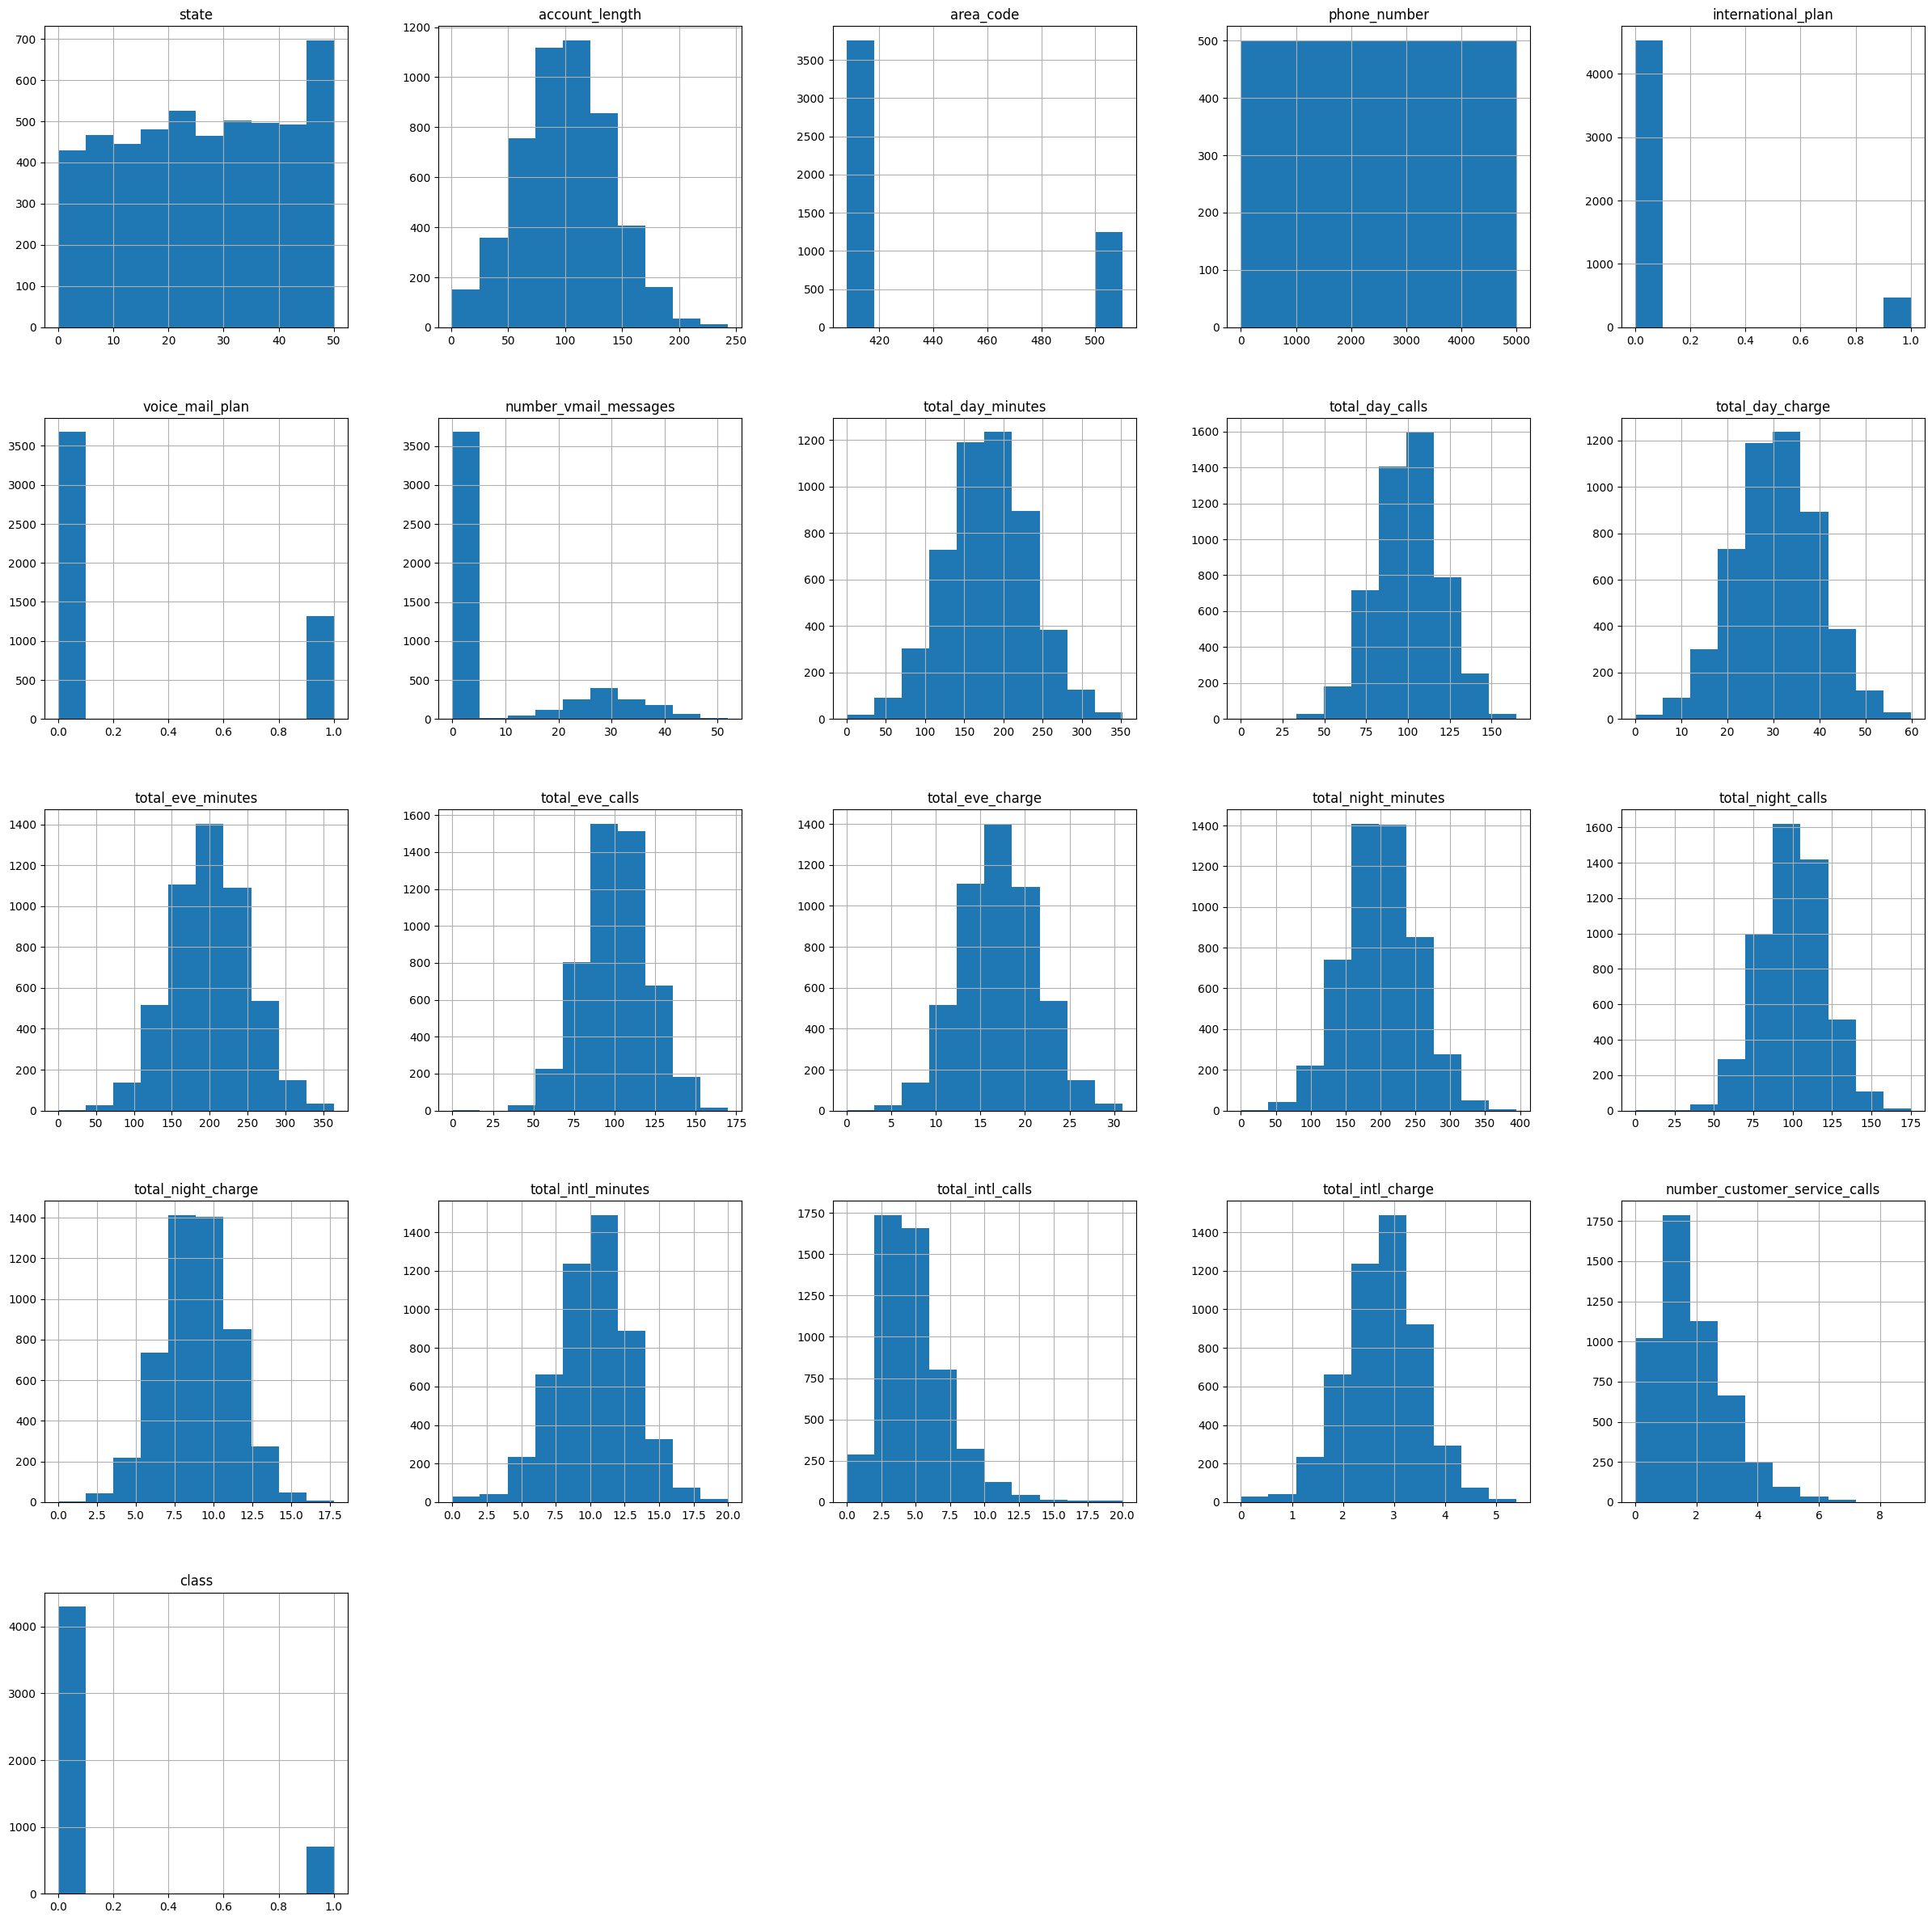

In [9]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [10]:
telecom_df["class"].value_counts() # count of customers who left and stayed

class
0    4293
1     707
Name: count, dtype: int64

<Axes: ylabel='count'>

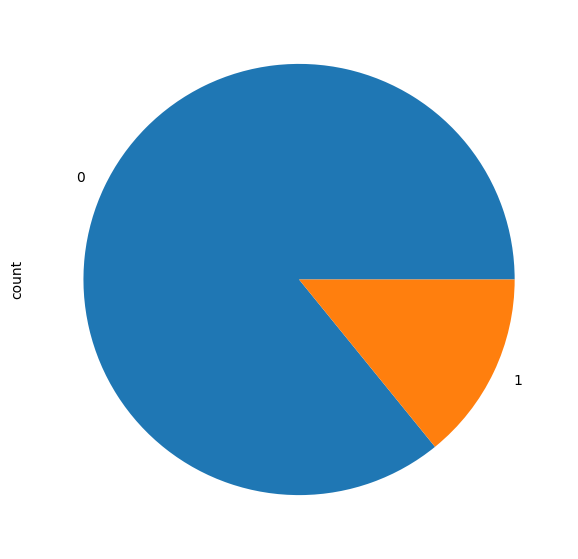

In [11]:
plt.figure(figsize = [7, 7])
telecom_df["class"].value_counts().plot(kind='pie')

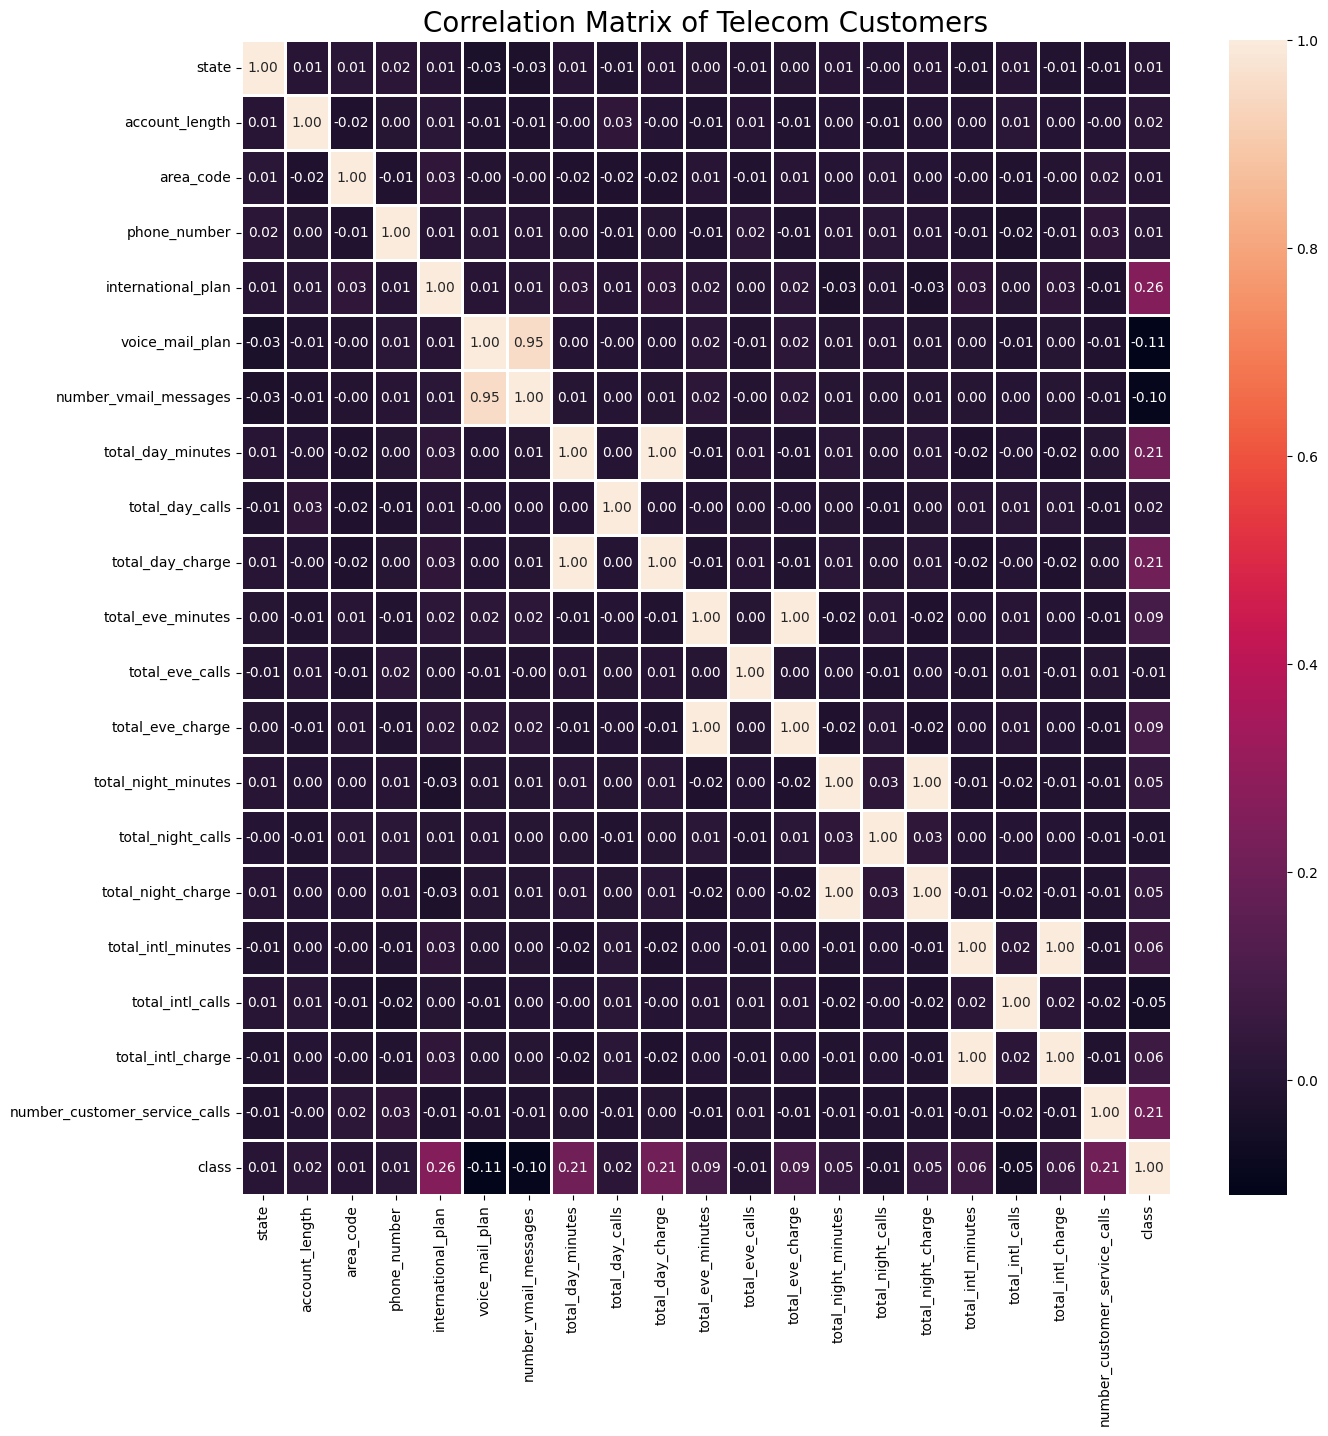

In [12]:
# Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

<ipython-input-13-2d2ad3904732>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
<ipython-input-13-2d2ad3904732>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],


Text(0.5, 1.0, 'Distribution of day charges by churn')

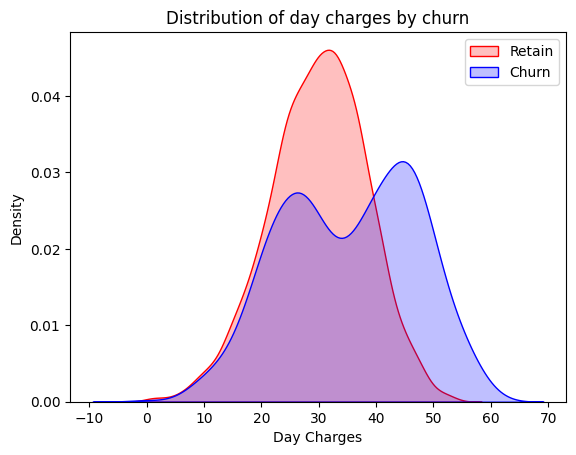

In [13]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

### Identifying feature importance and preparing the data before model training

In [14]:
# dropping 'area_code' and 'phone_number' column since they are no use for model

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = 'columns')
y = telecom_df["class"]

In [15]:
X.shape

(5000, 18)

In [16]:
y.shape

(5000,)

In [17]:
# Performing train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 150)

In [18]:
X_train.shape

(3500, 18)

In [19]:
X_test.shape

(1500, 18)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

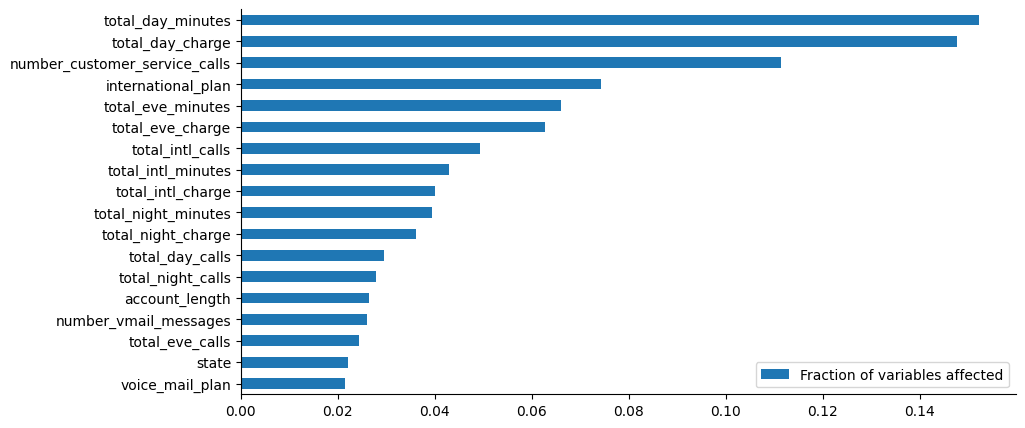

In [21]:
# Plotting the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [22]:
# The graph indicates that "total_day_minutes" tops the list of important features

### Training and evaluating a Logistic Regression Classifier

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_predict = model_LR.predict(X_test)

In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.40      0.08      0.14       201

    accuracy                           0.86      1500
   macro avg       0.64      0.53      0.53      1500
weighted avg       0.81      0.86      0.82      1500



In [26]:
# The above classifier has 86% accuracy but it has done well only in 0 class but not 1 class (0.14 f1-score)

### Training and evaluating a Support Vector Machine Classifier

In [27]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [28]:
y_predict = model_svm.predict(X_test)

In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1299
           1       0.52      0.14      0.23       201

    accuracy                           0.87      1500
   macro avg       0.70      0.56      0.58      1500
weighted avg       0.83      0.87      0.83      1500



<Axes: >

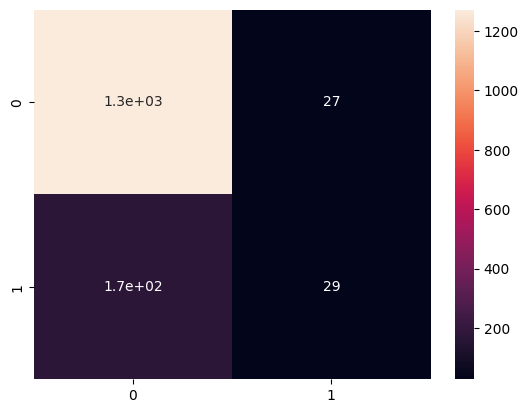

In [30]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

### Training and evaluating Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_predict = model_rf.predict(X_test)

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.96      0.76      0.85       201

    accuracy                           0.96      1500
   macro avg       0.96      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



<Axes: >

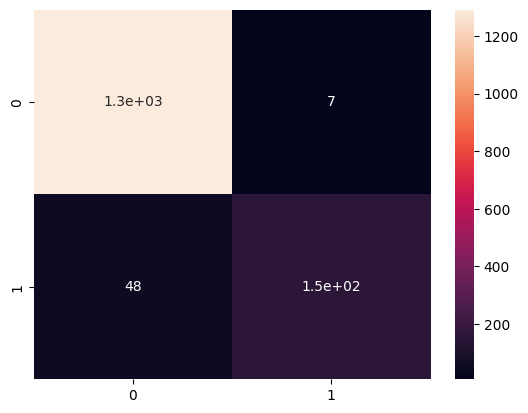

In [34]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

### Train and evaluate K nearest neighbor algorithm

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_predict = model_knn.predict(X_test)

In [37]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<Axes: >

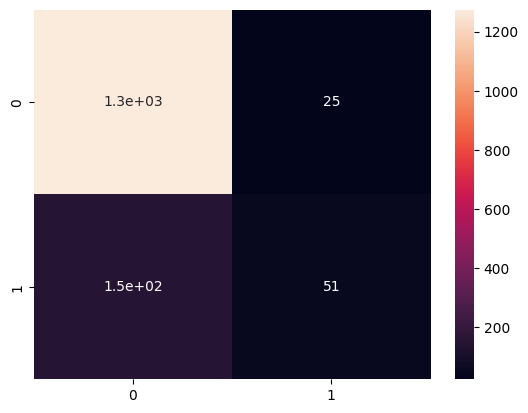

In [38]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

### Training and evaluating Naive Bayes classifier model

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
y_predict = model_gnb.predict(X_test)

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<Axes: >

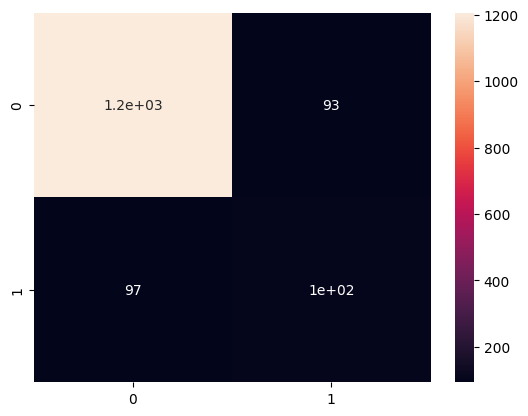

In [43]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

### Plotting ROC curves for the 5 models and finding AVC scores

In [44]:
model_LR.predict_proba(X_test)

array([[0.97399697, 0.02600303],
       [0.92129125, 0.07870875],
       [0.90564741, 0.09435259],
       ...,
       [0.92168469, 0.07831531],
       [0.94362711, 0.05637289],
       [0.97655829, 0.02344171]])

In [45]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [46]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [47]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 2.30946882e-03,
       2.30946882e-03, 3.07929176e-03, 3.07929176e-03, 4.61893764e-03,
       4.61893764e-03, 7.69822941e-03, 7.69822941e-03, 8.46805235e-03,
       8.46805235e-03, 1.15473441e-02, 1.15473441e-02, 1.53964588e-02,
       1.53964588e-02, 1.61662818e-02, 1.61662818e-02, 1.84757506e-02,
       1.84757506e-02, 1.92455735e-02, 1.92455735e-02, 2.00153965e-02,
       2.00153965e-02, 2.15550423e-02, 2.15550423e-02, 2.46343341e-02,
       2.46343341e-02, 2.77136259e-02, 2.77136259e-02, 2.92532717e-02,
       2.92532717e-02, 3.07929176e-02, 3.07929176e-02, 3.69515012e-02,
       3.69515012e-02, 4.00307929e-02, 4.00307929e-02, 4.15704388e-02,
       4.15704388e-02, 4.23402617e-02, 4.23402617e-02, 4.38799076e-02,
       4.38799076e-02, 4.46497306e-02, 4.46497306e-02, 4.54195535e-02,
       4.54195535e-02, 4.61893764e-02, 4.61893764e-02, 4.84988453e-02,
       4.84988453e-02, 5.08083141e-02, 5.08083141e-02, 5.31177829e-02,
      

In [48]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.00995025,
       0.00995025, 0.01492537, 0.01492537, 0.0199005 , 0.0199005 ,
       0.03482587, 0.03482587, 0.039801  , 0.039801  , 0.04477612,
       0.04477612, 0.06467662, 0.06467662, 0.06965174, 0.06965174,
       0.08457711, 0.08457711, 0.08955224, 0.08955224, 0.09452736,
       0.09452736, 0.09950249, 0.09950249, 0.10945274, 0.10945274,
       0.11442786, 0.11442786, 0.11940299, 0.11940299, 0.12437811,
       0.12437811, 0.12935323, 0.12935323, 0.13432836, 0.13432836,
       0.14925373, 0.14925373, 0.15422886, 0.15422886, 0.15920398,
       0.15920398, 0.16915423, 0.16915423, 0.17412935, 0.17412935,
       0.1840796 , 0.1840796 , 0.18905473, 0.18905473, 0.2039801 ,
       0.2039801 , 0.20895522, 0.20895522, 0.2238806 , 0.2238806 ,
       0.23880597, 0.23880597, 0.25373134, 0.25373134, 0.25870647,
       0.25870647, 0.26368159, 0.26368159, 0.26865672, 0.26865672,
       0.27363184, 0.27363184, 0.28358209, 0.28358209, 0.28855

In [49]:
thresh1

array([1.84557534, 0.84557534, 0.82973104, 0.76512672, 0.76320056,
       0.7472222 , 0.73544339, 0.72454579, 0.72430917, 0.68024247,
       0.659788  , 0.65247   , 0.63533555, 0.6009367 , 0.58554973,
       0.5465333 , 0.52916031, 0.52632429, 0.52458996, 0.51911935,
       0.50662982, 0.5063773 , 0.49504427, 0.49357758, 0.49140084,
       0.48520811, 0.4835081 , 0.47215181, 0.47032575, 0.46533193,
       0.45770863, 0.45492009, 0.45404044, 0.44782399, 0.43877416,
       0.41620029, 0.41602295, 0.41252623, 0.40940053, 0.40821668,
       0.40194751, 0.40187879, 0.40111314, 0.39590506, 0.39396179,
       0.39332564, 0.39163498, 0.39082489, 0.3894548 , 0.3887943 ,
       0.38468101, 0.3828992 , 0.38277544, 0.37651966, 0.37338179,
       0.37132219, 0.37057138, 0.3541155 , 0.3529204 , 0.34766113,
       0.34617766, 0.34272423, 0.33966104, 0.33616273, 0.33521886,
       0.32617354, 0.32603931, 0.32272879, 0.32179672, 0.31592737,
       0.31486846, 0.31483799, 0.31250589, 0.30777184, 0.30743

In [50]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [51]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6950696862109774
Support Vector Machine:  0.8063416558470159
Random Forest:  0.9130291575226255
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


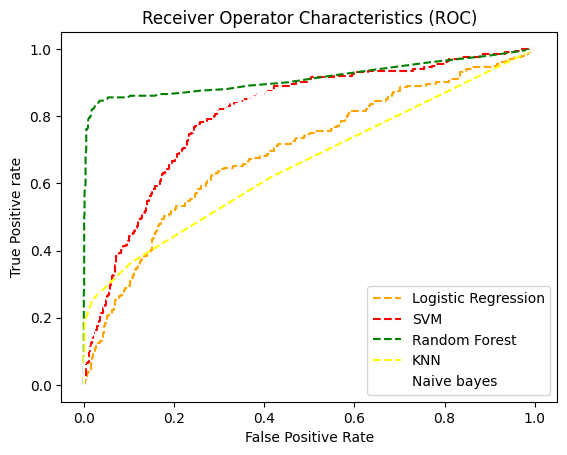

In [52]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

### We can clearly see that random forest is more accurate in this case

In [53]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.96      0.76      0.85       201

    accuracy                           0.96      1500
   macro avg       0.96      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500

